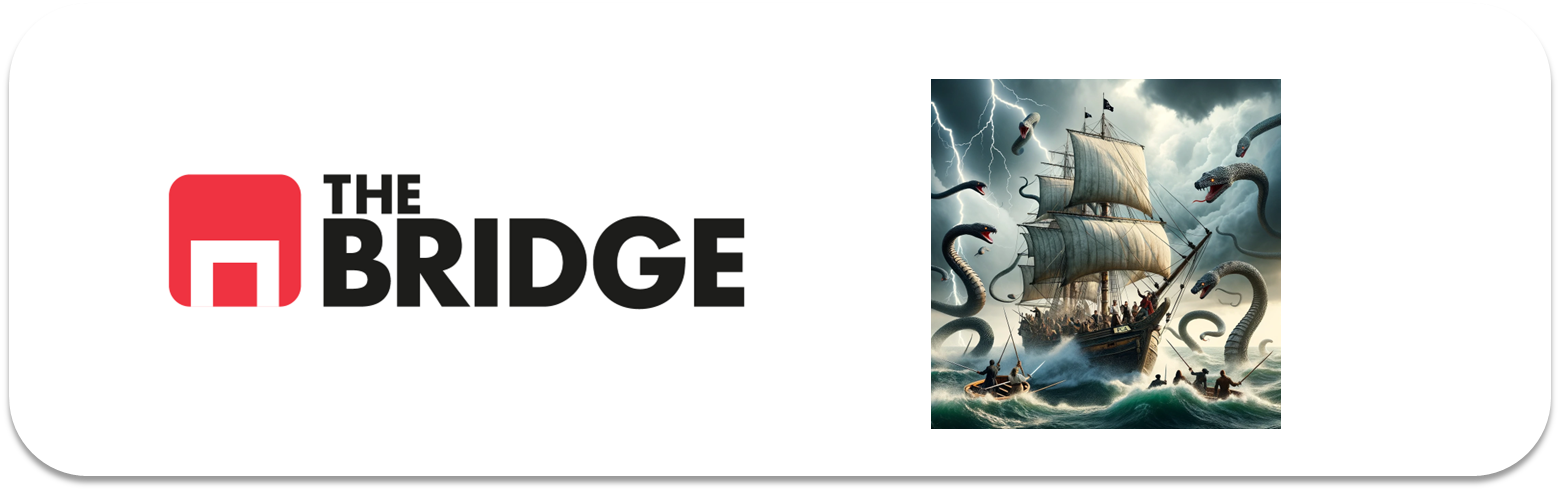

## Selección de Features (I): Motivación y tipos

**MOTIVACION**

$$*$$

¿Por qué sería necesario seleccionar características? Para algunos, esta idea puede parecer contraintuitiva, ya que a más datos en teoría más información.  

Al empezar el sprint ya vimos que existía lo que se denomina la maldición de la "dimensionalidad" que puede a veces quedarse en algo más etéreo o difícil de ver. Vayamos a varias razones muy prácticas por las cuales merece la pena seleccionar y descartar o por lo menos priorizar tus features:

1. Un tema de **rendimiento** (a veces menor, con datasets pequeños): A menos features menos tiempos de procesado (en entrenamiento y en produccion)  

2. Un tema de ingenieria, **soporte y escalabilidad**: A menos features, los procesos de prepración, ETL, y gestión son más manejables. Además a menos features, en general, menos probabilidad de fallos en esos procesos como consecuencia de los datos. (De nuevo depende muy mucho de los datasets).  

3. Un tema de **explicabilidad y atribución** (cada vez más necesario): A menos features son modelos más fáciles de atribuir (decidir que features o combinación son las "importantes") y, en general, de explicar.[NOTA: Aquí mecanismos que transforman las features para luego reducirlas, i.e: PCA, puntan menos]  

4. Un tema de **robustez**: A menos features, menor probabilidad de que faltan datos para las mismas y el modelo no falle en producción por falta de datos.  

5. Un tema de **regularizacion**: Menos features implican evitar problemas por los que algunos algoritmos confunden el ruido de las relaciones de algunas de estas y lo toman por información haciendo sobreajustes. Ya sabes, fastidia al modelo -> Lo haces más fuerte.

Finalmente, hay un tema adicional de **conocimiento de los datos** que no tiene que ver con la selección sino con el proceso de "seleccionar", te obliga a conocer tus datos (a mayor o menor nivel dependiendo del tipo de "selección"). Este conocimiento siempre es bueno, ayuda a gestionar expectativas y a conocer donde atacar cuando surgen problemas o los resultados no son los esperados. 

¿Hay que reducir siempre las features? No. De hecho, muchas veces ni pasaras por este paso (erróneamente). Siempre analiza tus features como si tuvieras que seleccionarlas. Toma notas de cuales son más informativas, cuales están más relacionadas, cuales se podrían transformar, por supuesto cuales son poco informativas, etc, etc. Priorizalas y luego úsalas todas si tu tiempo y tus recursos lo permiten, para luego hacer la selección. O no las uses todas y reservate las menos prioritarias, si los resultados acompañan, las tendrás ahí para tiempos de necesidad.

Ahh, sí, las features cuyo valor no cambia o es diferente para cada instancia (features invariantes y features indice) puedes obviarla para el modelo. Estas sí, aunque ojo con los índices para posteriores asignaciones e identificaciones.


**TIPOS y SUBTIPOS**

No es que existan formalmente unos tipos de selección de features, más bien hay mecánicas que varían según los datos de los que disponemos y de lo que queremos hacer con ellos y el nivel de profundidad del análisis. En esa línea distinguimos:

**A. Análisis "visual"**: Que se apoya en  medios visuales y numéricos (el que hemos empleado hasta ahora)  

**B. Análisis con métodos supervisados**: Se dan cuando tenemos un dataset con target y se apoya en relaciones numéricas de las features con el target. Vamos a ver tres subtipos:  
    B.1 Filter: Selección mediante medidas matemáticas de relación (depende del tipo de target y del tipo de feature, categórica y numérica). Es la versión más numérica del tipo anterior.  
    B.2 Intrinsic: Selección mediante un modelo. Se crea un modelo sencillo que prediga la variable target y se seleccionan las features de mayor importancia para trabajar en modelados posteriors más complejos.  
    B.3 Wrapper: Selección mediante wrapper. Se crea un modelo con todas o con una única feature, se hace una selección o deselección hasta llegar a un punto de compromiso.  

**C. Análisis con métodos no supervisados**: Nos vale para cualquier tipo de dataset y son métodos basados en varianzas y covarianzas:  
    C.1 Umbral de Varianza: Se fija un umbral de varianza y se descartan aquellas variables que no lo alcanzan.  
    C.2 PCA: Comentada y usada en la unidad anterior espcialmente dedicada ella.  

### **A. Análisis Visual**

Comenzamos repasando el método que hemos empleado en los modelados anteriores. Para ello vamos a usar dos datasets, el del titanic y el de la calidad  del vino, para ver los análisis con target categórico y con target numérico.

Consideraciones previas:
* El análisis visual no debería ser el único análisis pero también debería estar presente siempre que se pueda. Su ventaja subyacente es que obliga a "mirar" todas las features contra el target (caso de datasets supervisados). 
* Puede resultar inabordable si el número de features es muy alto en cuyo caso la estrategia propuesta es reducir empleando alguna de las otras técnicas y analizar visulamente las dudosas (en los umbrales) y las finalmente seleccionadas. 

#### Target Categórico: Titanic

NOTA: En este notebook, y como excepción, dado el diferente tipo de elementos que se tratan iremos importando las librerías a medida que se necesiten,y es eso, una excepción :-)

In [1]:
import bootcampviztools as bt
import pandas as pd

In [2]:
df = pd.read_csv("./data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


El target es "survived" y veremos el análisis contra una variable categórica ("who") y una numérica ("age"), empleando diferentes visualizaciones

In [4]:
target = "survived"
cat_col = "who"
num_col = "age"

IMPORTANTE: Durante todas las sesiones dedicadas a la selección de features vamos a usar todo el dataset que toque como train por simplicidad, recuerda que en tus modelos supervisados necesitarás crear un test.

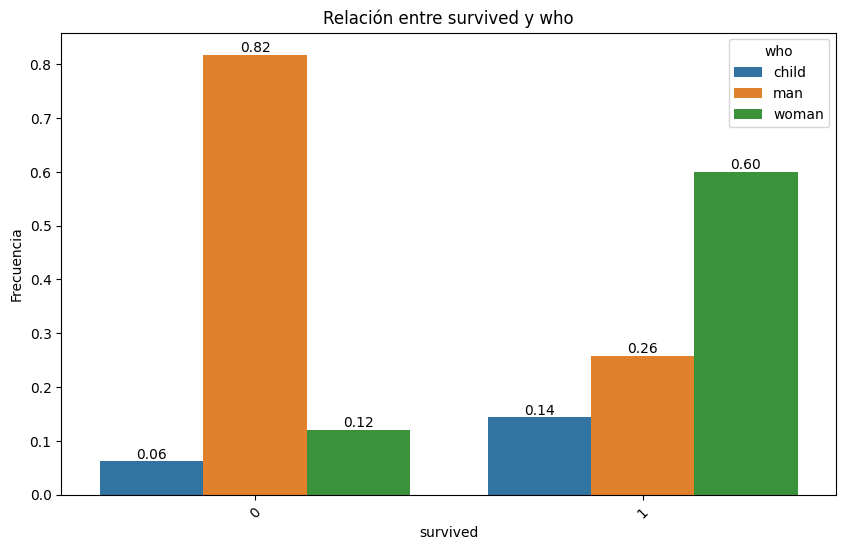

In [5]:
bt.plot_categorical_relationship_fin(df,target,cat_col,show_values= True, relative_freq= True)

En este caso nos fijamos en:
* Figuras diferentes
* Valores de distribución diferente para las mismas categorías en cada una de las categorías del target
En concreto: Tienen distribuciones claramente diferentes para 0 y 1 con valores en algunas categorias de la feature analizada (la que no es target) sensiblemente diferente. Nos la quedamos como prioritaria.

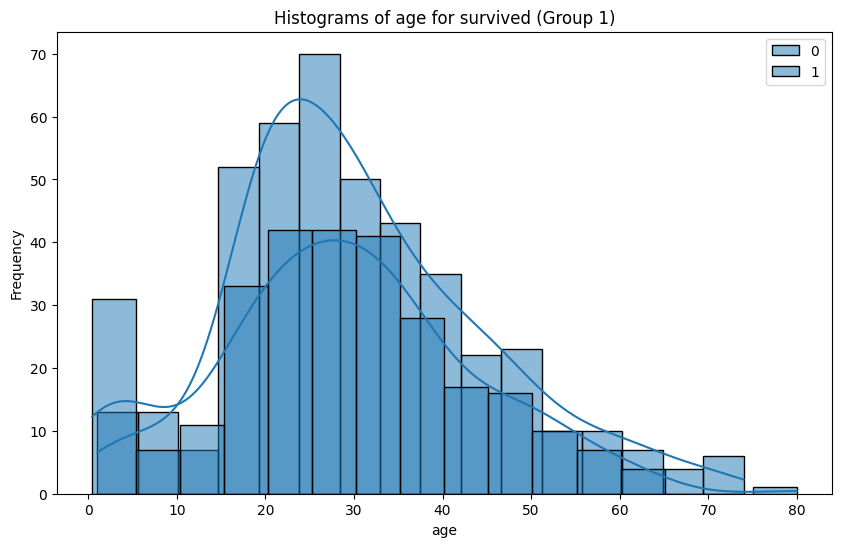

In [6]:
bt.plot_grouped_histograms(df,cat_col = target, num_col= num_col, group_size= 2)

* En estos casos nos fijamos en que las distribuciones no se superpongan completamente, que existan desplazamientos de una frente a la otra y que existan áreas donde predominen claramente una sobre la otra (en un target binario, en un multiclase tendríamos que comparar todas a la vez o de dos en dos).
* En concreto, aquí se ve una predominancia del 1 para edades bajas y del 0 para edades más altas. Eso le da cierto valor predictivo pero se superponen mucho las dos figuras. Sería una feature de segunda prioridad, pasando a primera si no hubiera otra numérica continua con esa categoría.

### Target Numérico: Calidad del Vino


En este caso tenemos un target numérico y vamos a ver como visualizarlo ante un variable categórica y como analizar con varias numéricas gracias a las correlaciones, que además nos permiten ver colinealidades posibles:

In [7]:
df_wines= pd.read_csv("./data/wines_dataset.csv", sep = "|")
df_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [8]:
target = "alcohol"
cat_col = "class"
num_col = "density"

Para el caso de la categórica, es similar a cuando el target es categórico y la feature numérica, pintamos las distribuciones de la numérica para cada uno de los valores de la categórica:

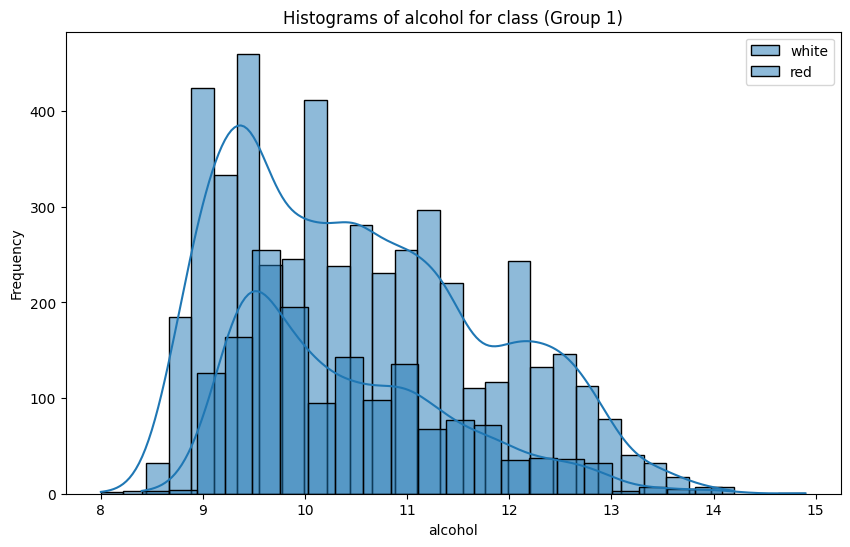

In [9]:
bt.plot_grouped_histograms(df_wines, cat_col = cat_col, num_col = target, group_size= df_wines[cat_col].nunique())

* Miramos los mismos elementos que antes: 
* Separación entre distribuciones, zonas dominadas, cruces de kde...
* En este caso hay una zona dominante de la clase white tanto para valores superiores como para valores inferiores el resto es bastante similar. "Class" estaría entre una prioridad media y baja.

Para las numéricas, vemos las correlaciones (repetiremos en algún subtipo B) y luego la matriz de correlación a través del heatmap:

In [10]:
features_num = df_wines.columns.to_list()
features_num.remove("class")


In [11]:
import numpy as np

corr= df_wines[features_num].corr()
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending = False)

alcohol                 1.000000
density                 0.686745
quality                 0.444319
residual sugar          0.359415
total sulfur dioxide    0.265740
chlorides               0.256916
free sulfur dioxide     0.179838
pH                      0.121248
fixed acidity           0.095452
volatile acidity        0.037640
citric acid             0.010493
sulphates               0.003029
Name: alcohol, dtype: float64

Estableceremos un punto de corte y nos quedaremos con las que superen ese punto de corte para luego compararlas en un heatmap:

In [12]:
r_minimo = 0.10
features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list()
features_num_sel

['residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'alcohol',
 'quality']

<Axes: >

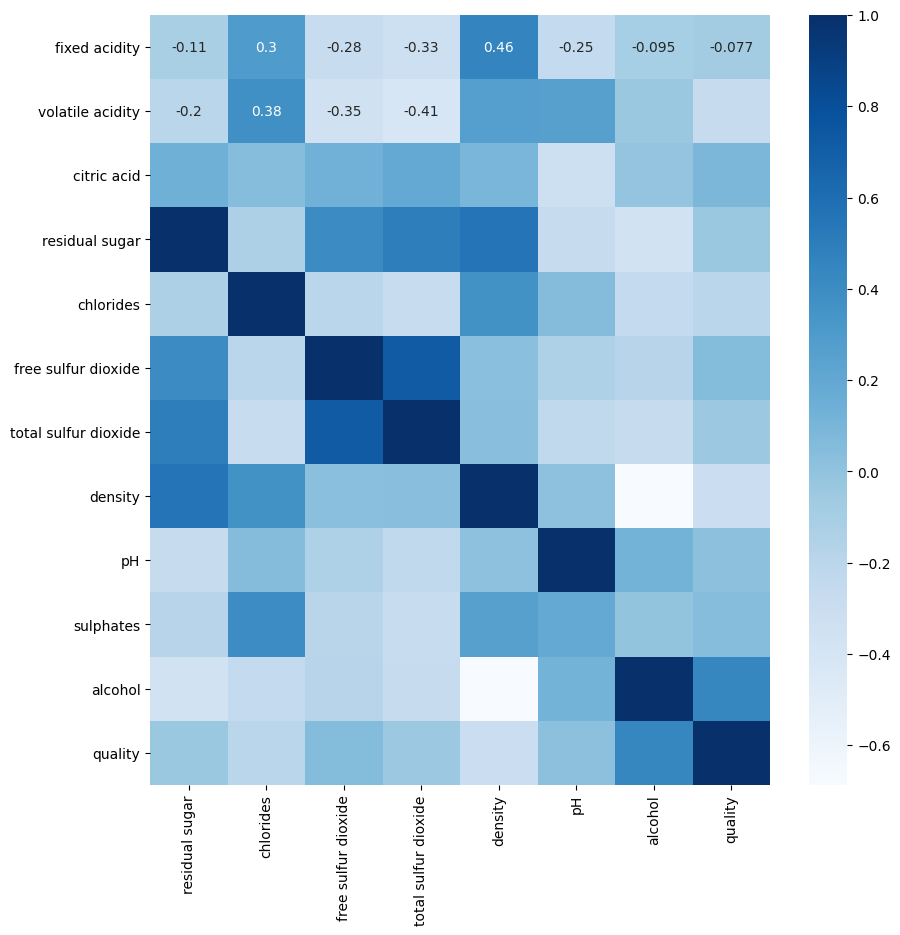

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr[features_num_sel], annot= True, cmap= "Blues")

Y ahora sobre la matriz seleccionaríamos como de primera prioridad las que no estuvieran correlacionadas con otra de mayor correlación con el target. Y las restantes como de segunda prioridad.

El análisis visual de features numéricas en problemas con target numérico debe completarse con una visualización bivariante de diagramas de dispersión de forma que si existen relaciones no lineales podamos también observarlas y tenerlas en consideración.

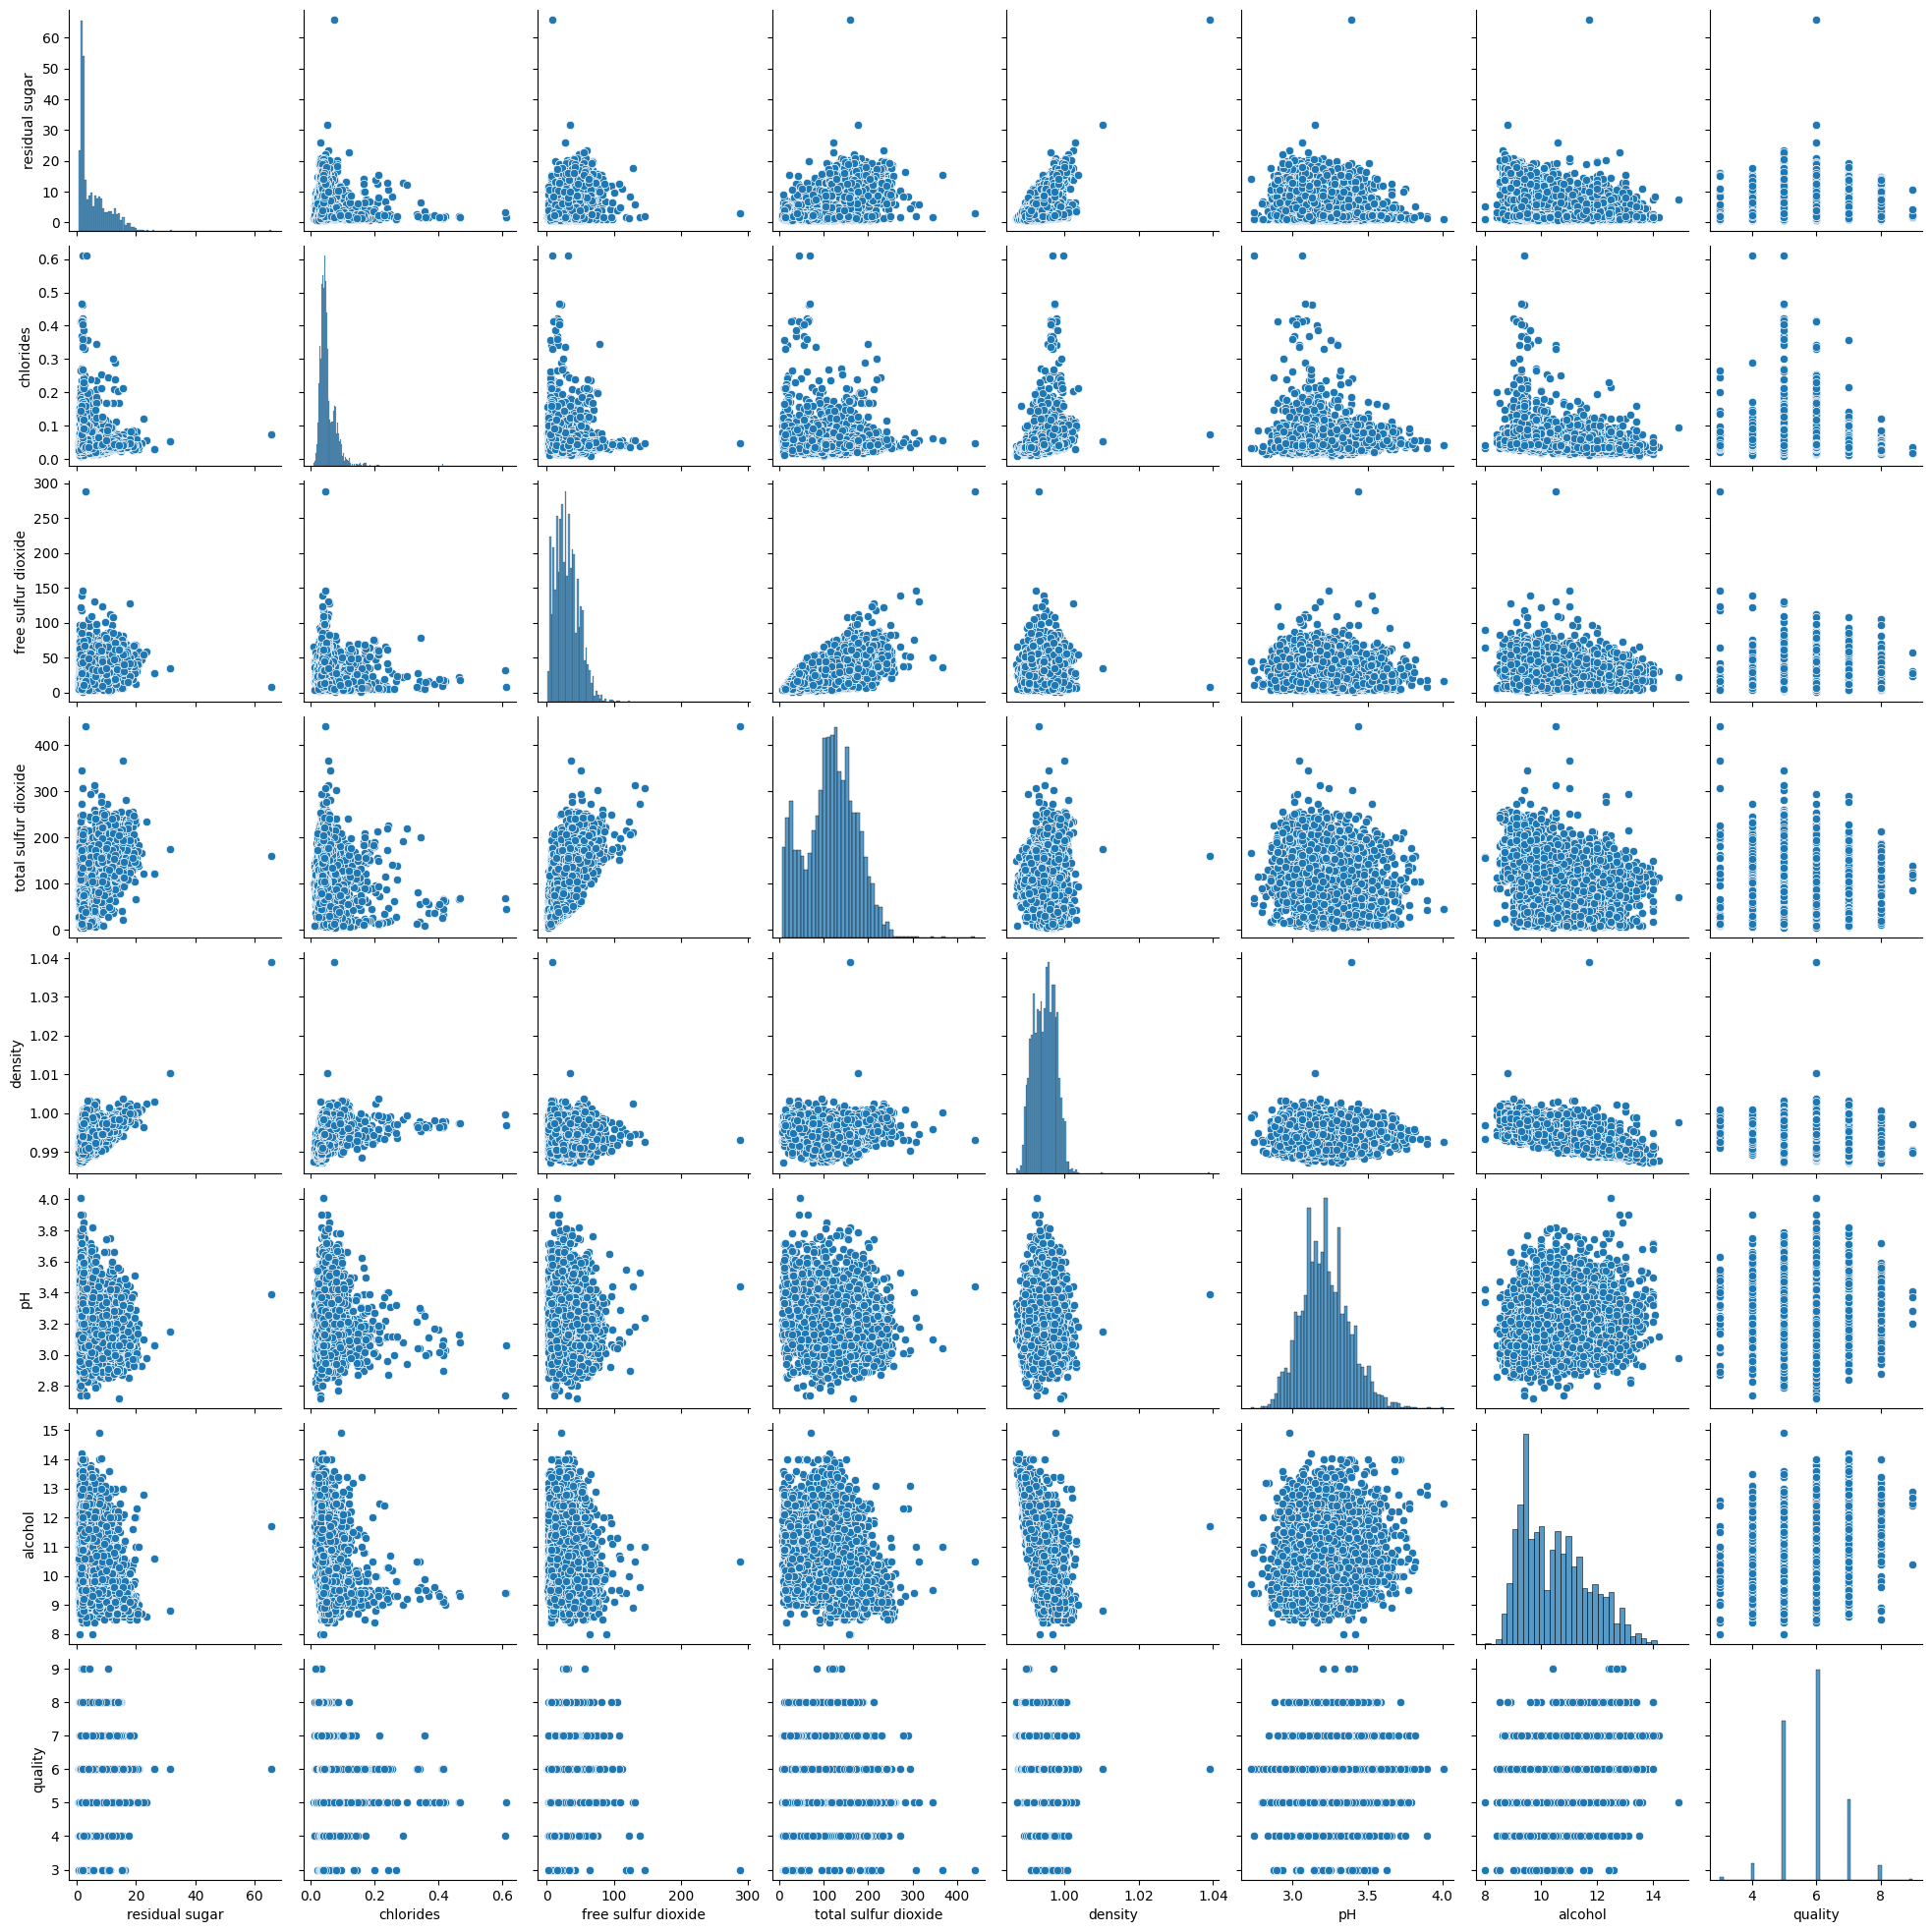

In [16]:
sns.pairplot(df_wines[features_num_sel])

***

### **B. Análisis con datasets supervisados**


#### B.1 Filter (Filtrado): Selección con métricas y tests

En este caso recurrimos a los test y coeficientes que nos dicen si existe relación entre las difernetes features y el target. También se pueden aplicar para ver si existe relación entre las diferenes features entres sí (y evitar efectos tipo colinealidad).

La elección del coeficiente o test depende del tipo de cada variable comparada, una guía de que usar la tienes en la siguiente figura:

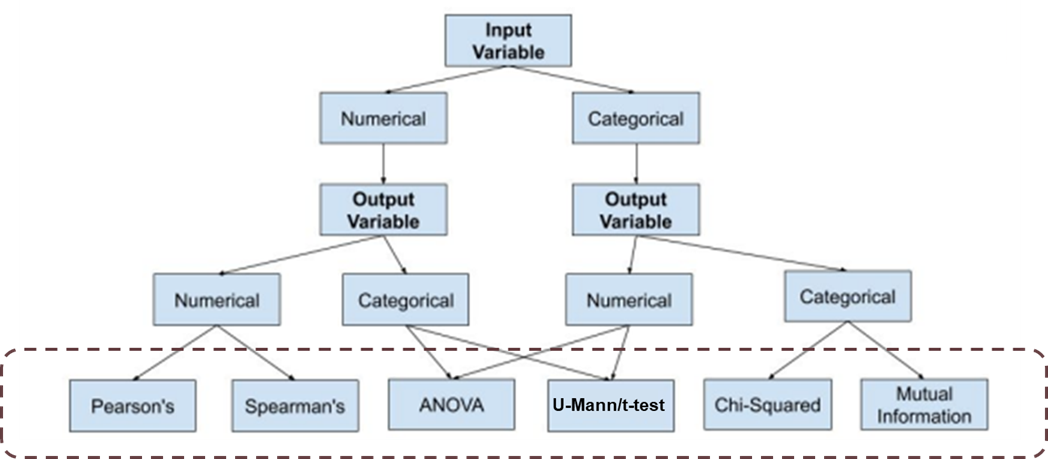

Salvo la correlacción de Spearman y el coeficiente de información muta, el resto son los test que vimos en su momento a la hora de estudiar la relación entre features en el análisis bivariante. En esta sesión veremos la métrica de Mutual Information que al igual que la correlación complementa el análisis visual de scatter plots, este coeficiente complementa nuestro análisis visual de categóricas con categóricas.

### Cómo usar estas métricas

1. Escoge la adecuada en función del tipo de features que quieras comparar.
2. En el caso de las correlaciones y el Mutual Information puedes poner un umbral (o varios) de superación de la métrica para considerar o agrupar las features por importancia/prioridad (como hemos hecho con la correlación en el análisis visual)
3. En el caso de los test, puedes utilizar el p-value (a menor p-value mejor) para ordenar las features en importancia/prioridad.



#### Mutual Information



Para obtener el coeficiente de Información Mutua (Mutual Information, MI) entre dos variables categóricas en Python, usaremos la función `mutual_info_score` del módulo `sklearn.metrics`. La Información Mutua es una medida de la cantidad de información que una variable contiene sobre otra. En el contexto de variables categóricas, esto puede ayudarte a entender cuánto se puede saber sobre una variable al observar la otra.

Es importante mencionar que la Información Mutua es simétrica: \(MI(X;Y) = MI(Y;X)\), lo que significa que el orden de las variables no afecta el resultado.

La Información Mutua es especialmente útil en la selección de características para modelos de aprendizaje automático, ya que permite identificar y seleccionar las características que comparten más información con la variable objetivo, potencialmente mejorando el rendimiento del modelo.

In [17]:
# Volviendo al titanic
from sklearn.metrics import mutual_info_score
features_cat = ["who","embarked","pclass","alone"]
target = "survived"
df_mi = df.dropna()
for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(df_mi[col],df_mi[target]))

MI(who;survived): 0.19164749145327512
MI(embarked;survived): 0.005531414753525178
MI(pclass;survived): 0.0067878230395326325
MI(alone;survived): 0.006223339079755308


La información mutua se interpreta:

- Un valor de \(I(X; Y) = 0\) indica que \(X\) e \(Y\) son completamente independientes, es decir, el conocimiento de \(X\) no proporciona ninguna información sobre \(Y\), y viceversa.
- Un valor mayor de \(I(X; Y)\) indica una mayor dependencia o información compartida entre \(X\) y \(Y\).



#### Pearson y Spearman

Para obtener una correlación entre dos series de datos en Python, podemos usa Pandas y NumPy, como ya sabes:

**Usando Pandas**

Si tus datos están en estructuras de datos de Pandas (por ejemplo, `Series`), puedes utilizar el método `corr` para calcular la correlación. Pandas soporta varios métodos de correlación como Pearson (por defecto), Spearman y Kendall.


In [18]:

# Crear dos series de datos
serie1 = pd.Series([1, 2, 3, 4, 5])
serie2 = pd.Series([5, 4, 3, 2, 1])

# Calcular la correlación de Pearson
correlacion_pearson = serie1.corr(serie2)
print(f"Correlación de Pearson: {correlacion_pearson}")

# Para calcular la correlación de Spearman o Kendall, especifica el método
correlacion_spearman = serie1.corr(serie2, method='spearman')
print(f"Correlación de Spearman: {correlacion_spearman}")


Correlación de Pearson: -0.9999999999999999
Correlación de Spearman: -0.9999999999999999



**Usando NumPy**

NumPy no tiene una función directa para calcular correlaciones entre dos series, pero puedes calcular el coeficiente de correlación de Pearson usando `numpy.corrcoef`, que devuelve la matriz de correlación.


In [19]:

import numpy as np

# Arrays de datos
datos1 = np.array([1, 2, 3, 4, 5])
datos2 = np.array([5, 4, 3, 2, 1])

# Calcular la matriz de correlación
matriz_correlacion = np.corrcoef(datos1, datos2)

# El coeficiente de correlación de Pearson está en la posición [0, 1] y [1, 0]
print(f"Correlación de Pearson: {matriz_correlacion[0, 1]}")
print(matriz_correlacion)



Correlación de Pearson: -0.9999999999999999
[[ 1. -1.]
 [-1.  1.]]


Te recuerdo aquí como hacer el test de significación de la correlación de Pearson, acudiendo a Scipy:

In [20]:
from scipy.stats import pearsonr

pearsonr(df_wines["alcohol"], df_wines["density"])

PearsonRResult(statistic=-0.6867454216821356, pvalue=0.0)

Si el valor de p-value está por debajo de 1- Nivel de significación deseado, entonces podemos aceptar la hipótesis alternativa de que existe correlación significativa entre las features. (En este ejemplo la existe al 100%)

#### Categorica (no binaria y binaria)-Numerica: ANOVA

Lo empleamos para testar si existe relación significativa entre una variable numérica y una categórica (cualquiera de ellas puede ser el target o simplemente por ver posible relación entre dos features)

In [21]:
from scipy import stats

In [22]:
cat_col = "quality"
quality_cat = df_wines[cat_col].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
alcohol_por_quality = [df_wines[df_wines[cat_col] == categoria]['alcohol'] for categoria in quality_cat] # obtenemos los ingresos por compañía y los incluimos en una lista

In [23]:
f_val, p_val = stats.f_oneway(*alcohol_por_quality) # El método * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)


Valor F: 320.5934478029265
Valor p: 0.0


Si el valor de p-value está por debajo de 1- Nivel de significación deseado, entonces podemos aceptar la hipótesis alternativa de que existe relación entre las variables a ese nivel de significación.

Existe una forma de obtener las mejores k variables numéricas en función de su **ANOVA con un target categórico**:

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

'''
f_classif realiza un test ANOVA
a técnica de análisis de varianza (ANOVA) también conocida como análisis factorial y desarrollada por Fisher en 1930,
constituye la herramienta básica para el estudio del efecto de uno o más factores (cada uno con dos o más niveles) sobre
la media de una variable continua. Es por lo tanto el test estadístico a emplear cuando se desea comparar las medias de
dos o más grupos.
'''
#features_num.remove("quality")
X_train = df_wines[features_num]
y_train = df_wines["class"]# categorica
selector = SelectKBest(f_classif, k=5)# me escogera las 5 features conel pvalues mas bajo
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest



,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,sulphates
0,8.5,0.21,0.034,142.0,0.37
1,8.3,0.16,0.025,107.0,0.37
2,6.8,0.18,0.038,111.0,0.59
3,6.1,0.26,0.047,440.0,0.64
4,7.5,0.63,0.083,91.0,0.58
...,...,...,...,...,...
6492,7.7,0.39,0.056,178.0,0.60
6493,8.2,0.73,0.074,13.0,0.52
6494,7.4,0.31,0.042,204.0,0.59
6495,8.3,0.65,0.089,40.0,0.55


#### Categórica (binaria)- Numérica: U de Mann-Whitney

Cuando la categórica es binaria podemos hacer la prueba U para comprobar si existe una relación estadísticamente significativa entre la features numérica y la categórica:

In [25]:
from scipy.stats import mannwhitneyu
cat_col = "class"
num_col = "alcohol"

grupo_a = df_wines.loc[df_wines[cat_col] == "white"][num_col]
grupo_b = df_wines.loc[df_wines[cat_col] == "red"][num_col]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 4002858.5
Valor p: 0.18184514400050011


Podríamos usar el valor de p como indicador de la fuerza de la relación a p más bajo menor seguridad de la existencia de relación. En este caso el p-value de la prueba invita a considerar class como una feature predictora de alcohol como de segunda prioridad, por ejemplo.

#### Categórica-Categórica (Chi-2 (χ²)):

Además del Mutual Information introducido esta sesión, tenemos el test Chi-2 para evaluar si existe relación entre dos features categóricas:

In [26]:
cat_1 = "pclass"
cat_2 = "who"

#Es necesario obtener la tabla de contingencia (sabemos hacerlo con Pandas):

tabla_contingencia = pd.crosstab(df[cat_1], df[cat_2])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)


Valor Chi-Cuadrado: 37.34293526831214
P-Value: 1.5308103860076598e-07
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[ 20.12121212 130.18181818  65.6969697 ]
 [ 17.14029181 110.8956229   55.9640853 ]
 [ 45.73849607 295.92255892 149.33894501]]


En este caso la relación tiene una clara significación estadística. 

***

#### B.2 Intrinsic: Selección mediante un modelo


Otro enfoque es usar algún modelo base para la evaluación de características porque el modelo mostrará claramente la importancia de las características.  

Se suelen usar dos tipos de modelos: alguna composición "rígida" como RandomForest o un modelo lineal con regularización Lasso para que tenga tendencia a neutralizar pesos de características débiles. La lógica es intuitiva: si las características son claramente inútiles en un modelo simple, no es necesario arrastrarlas a uno más complejo.

Instanciamos nuestros dos modelos de selección:

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr_selector = LogisticRegression(max_iter = 1000)
rf_selector = RandomForestClassifier(random_state= 42)


In [28]:
rf_selector.fit(df_wines[features_num],df_wines["class"])

RandomForestClassifier(random_state=42)

In [29]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.15318845, 0.27424545, 0.26653674])

Y empleamos un objeto específico de `sklearn`:

In [30]:
from sklearn.feature_selection import SelectFromModel# pàra poder usar el selector necesitamos un modeloo entrenao que tenga el atributo .coef_ o .freaure_impartece_

In [31]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") # El modelo debe tener un atributo feature_importances_ o un atributo coef_
# este selector lo que gace es una estimacion con el modelo entrenado y en este acsi sobre la mediana de la columnas

Threshold determina que features pasan. El estimador (el modelo de referencia) debe poder proporcionar unas importancias a las features. En este caso "median" implica que sólo nos quedamos con las features cuya importancia para el modelo de referencia es superior a la mediana de las importancias (es decir con la mitad superior). Si no damos valor entonces el valor de corte es la media.

In [32]:
selector_model.fit(df_wines[features_num],df_wines["class"]) 

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [33]:
selector_model.get_feature_names_out()

array(['volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'sulphates'], dtype=object)

In [34]:
X_train_model = pd.DataFrame(selector_model.transform(df_wines[features_num]), columns = selector_model.get_feature_names_out())
X_train_model

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates
0,0.21,0.034,73.0,142.0,0.99450,0.37
1,0.16,0.025,38.0,107.0,0.99306,0.37
2,0.18,0.038,35.0,111.0,0.99180,0.59
3,0.26,0.047,289.0,440.0,0.99314,0.64
4,0.63,0.083,17.0,91.0,0.99616,0.58
...,...,...,...,...,...,...
6492,0.39,0.056,35.0,178.0,0.99740,0.60
6493,0.73,0.074,5.0,13.0,0.99680,0.52
6494,0.31,0.042,62.0,204.0,0.99830,0.59
6495,0.65,0.089,17.0,40.0,0.99803,0.55


Comparemos ahora un modelo de regresión logística entrenado con todas las features, con las features obtenidas filtrando por ANOVA que obtuvimos en la sesión anterior y con todas las features:


In [35]:
df_wines["class"].value_counts()

class
white    4898
red      1599
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import cross_val_score

for nombre,set in zip(["Selected from Random Forest", "Selected by ANOVA", "Full num features"],[X_train_model, X_train_kbest, X_train[features_num]]):
    print(f"Para el dataset <{nombre}>: num_features: {len(set.columns.to_list())}, score", sep = " ")
    print(np.mean(cross_val_score(lr_selector, set, y_train, cv = 5, scoring = "balanced_accuracy")))

Para el dataset <Selected from Random Forest>: num_features: 6, score
0.956779522730687
Para el dataset <Selected by ANOVA>: num_features: 5, score
0.9619843755278872
Para el dataset <Full num features>: num_features: 12, score
0.9756758734982846


En este caso la selección por ANOVA ha resultado la más eficiente en término de features, métricas.

Podríamos haber usado cualquier modelo en vez del RandomForest que tenga posibilidad de obtener coeficientes o importancias.


***

#### B.3 Wrapper

Este tipo de mecanismos se basan en ir quitando o sumando features hasta alcanzar un umbral en una métrica de selección (normalmente la métrica que usaríamos en el problema a resolver con el modelo que estemos buscando) o conseguir pocas variaciones por debajo o por encima del mismo o alcanzar un número de features determinado por el usuario (o sea nosotros).  

Veremos dos aproximaciones:
1. Partir de todas las features e ir entrenando modelos quitando cada vez la feature con menor peso hasta llegar a la condición de parada.  
2. Partir de una feature e ir añadiendo features hasta alcanzar la condición de parada  

#### Eliminación recursiva de features

Se escoge un estimador o modelo y un numero n de features. Se lanza el estimador con TODAS
las features y se calcula el "feature importance" de estimador. La peor feature se
elimina y se tira otro modelo con una feature menos, asi hasta alcanzar n

Puedes verlo como una combinación iterativa del selection by model en el que no haces un único corte sino que vas haciendo cortes sucesivos para así captar los posibles cambios en las importancias de las features al tener cada vez menos.

En sklearn se implementa con `RFE` (Recursive Feature Elimination) y necesita de un modelo que tenga o bien el atributo `feature_importances_` o `coef_`

In [ ]:
from sklearn.feature_selection import RFE

X_train_wines = df_wines[features_num].copy()
y_train_wines = df_wines["class"]

In [ ]:
rf_RFE = RandomForestClassifier(random_state= 42) # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train_wines, y_train_wines)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_num).sort_values("ranking")

Podemos chequear con las features obtenidas en otros selectores:

In [ ]:
print("Seleccionadas por modelo:", list(selector_model.get_feature_names_out()))

In [ ]:
print("Seleccionadas por ANOVA:", X_train_kbest.columns.to_list())

¿Y con cual me quedo? Lo hablaremos al final :-) (para que sigas con las píldoras). Pero antes, observa que RFE no permite decidir el scoring para seleccionar las features, usa el metodo `score` de cada modelo (que en los de clasificación suele ser el acuracy y en los de regresión el RMSE) y que selecciones empleando ANOVA, por ejemplo, no miran scoring alguno, por lo que es fácil que salgan selecciones diferentes.

Para terminar este método, el objeto RFE te permite obtener con su método `transform` el dataset ya sólo con las columnas seleccionadas, eso sí lo devuelve como un array de numpy y hay que hacer alguna cosita si quiero convertirlo a DataFrame:

In [ ]:
rfe.transform(X_train_wines)

In [ ]:
X_train_rfe_wines = pd.DataFrame(rfe.transform(X_train_wines), columns = rfe.get_feature_names_out())
X_train_rfe_wines

#### Selección secuencial de Features

En este caso empezamos con una feature y vamos añadiendo hasta llegar a un límite de features o bien hasta alcanzar un umbral o valor que no varía excesivamente (tendremos que tener una tolerancia).

En general funciona así:
1. Se entrena un modelo para cada feature con esa feature como predictora. Nos quedamos con la feature que consiga el mejor modelo (tendremos que seleccionar una métrica)
2. Se entrena un modelo para cada combinación de la feature escogida y el resto de features. Nos quedamos con la mejor combinación.
3. Se repite 2 hasta llegar a la condición de parada.

Por supuesto en "sklearn" tenemos una clase para hacerlo: `SequentialFeatureSelector`, que tiene la ventaja de que puede aplicarse aunque el modelo guía no tenga ni feature_imporances_ ni coef_ en sus atributos.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train_wines, y_train_wines)


Observa los tiempos de ejecución, SFS es un mecanimos greedy (glotón) es decir que lo prueba todo, como el GridSearch, y por eso tardar tanto. Por otro lado, respecto a las elegidas aquí no hay ranking:

In [ ]:
print("Elegidasd SFS:", sfs_forward.get_feature_names_out())

Y de nuevo es diferente la selección. Hmmm, qué interesante. 

***

### **C. Análisis con métodos no supervisados**

Vamos a "ver" dos mecanismos que puedes aplicar a un dataset independientemente de si tiene target o no (de ahí lo de no supervisados):

1. PCA (Análisis de Componentes Principales)
2. Umbral de Varianza

#### PCA

No vamos a repetir lo que ya hemos visto, solo a repasar los pasos para obtener las PCAS y luego hacer selección:
1. Obtener todas las PCAs (usando sklearn)
2. Analizar la proporción acumulada de varianza y escoger un umbral mínimo 
3. Escoger las PCAs según ese umbral. 
4. Trabajar con el datset transformado (es decir usando el resultado de aplicar las PCAS de 3)

$$*$$

#### Umbral de Varianza

Es el mecanismo más sencillo y se basa en la idea de que las features que varían poco tienen poca información (al igual que las que son difererntes para todas las instancias)

Basado en lo anterior, escogemos un umbral de varianza mínima y seleccionamos aquellas features cuya varianza esté por encima:

In [ ]:
from sklearn.feature_selection import VarianceThreshold

umbral_varianza = 0.5

var_selector = VarianceThreshold(umbral_varianza)
var_selector.fit(X_train_wines)
print("Lista seleccionada para selector de Varianza", var_selector.get_feature_names_out())

Y como todos los transformadores de `sklearn` permite obtener el array transformado es decir solo con las features seleccionadas:

In [ ]:
X_train_var = var_selector.transform(X_train_wines)
X_train_var

In [ ]:
X_train_var = pd.DataFrame(var_selector.transform(X_train_wines), columns= var_selector.get_feature_names_out())
X_train_var

Observa que no necesitamos un target para nada, con lo que es posible aplicarlo en cualquier dataset. Lo útil o no que sea depende del problema y contexto. 

### **A MODO DE GUIA**

Para terminar, y sólo como una guía y no unos mandamientos, te dejo aquí algunas sugerencias:

1. MiniEDA: Haz siempre que puedas un análisis visual, aunque sea después de una selección inicial si son demasiadas features.
2. Si puedes: no descartes, crea listas con diferente nivel de prioridad y haz "selección de listas".
3. Mecanismos basados en test: Utiliza p-value para ordenar (de menor a mayor p-value) las features. Selecciona las n mejores (n lo tendrás que poner tú, que algo tendrás que hacer, vamos digo yo)
4. Aplica todos los mecanimos que creas conveniente (aunque algunos podrás y otros no según el contexto). Recuerda: PCA transforma y para luego explicar hay que acudir a las relaciones de cada PCA con las features originales (que es farragoso pero se puede hacer). 
5. Si aplicas varios mecanismos, ¿con cual me quedo?:
    5.1 En caso supervisado: Puedes entrenar cada selección por separado y quedarte con la que mejor score te de en la validación cruzada.  
    5.2 Puedes implementar un mecanismo de voting. Por ejemplo: Por cada método que seleccione una feature le das un voto, y al final te quedas con las más votadas.  
    5.3 Sé creativo   
    

Para terminar...

DALE LA VUELTA (para todos aquellos que pensaís que el EDA se terminó presentando el proyecto): Usa el ML para analizar las variables y aplicarlo a tus EDAs. Una parte importante, si no la que más, en un EDA es el análisis multivariante, los modelos en el fondo nos dicen que hay relación entre las variables. Prueba a predecir (buscar la relación) de cada variable de tu EDA con el resto y enriqueceras tu análisis de forma asombrosa...